## **OJECTIVE : Training classification model to find the model which would optimally classify legitimate and malicious domains.**

Our dataset consist of 450k samples of legitimate and malicious domain urls,in this notebook we'll first explore the dataset and then train a classifier model which would optimally predict phishing and legitimate urls.

**NOTE** : Our dataset is Imbalanced. We'll use SMOTE to oversample dataset.

In [4]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data Analysis**

We have 21 features out of which 18 features were extracted from dataset in the previous notebook, the 'results' feature is the ground truth while the remaining 2 features ('url' , 'label') are only there for reference and can will be removed during training of the model.

In [5]:
# loading out dataset from previous notebook
urldata = pd.read_csv("Url_Processed.csv")

# droping "Unnamed: 0" as its unncessary feature
urldata.drop("Unnamed: 0",axis=1,inplace=True)

urldata.head(10)

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1
5,https://www.reddit.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,-1
6,https://www.yahoo.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
7,https://www.google.co.in,benign,0,24,16,0,0,0,0,0,...,3,0,1,1,1,0,18,0,1,1
8,https://www.qq.com,benign,0,18,10,0,0,0,0,0,...,2,0,1,1,1,0,13,0,1,1
9,https://www.amazon.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1


In [6]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450300 entries, 0 to 450299
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              450300 non-null  object
 1   label            450300 non-null  object
 2   result           450300 non-null  int64 
 3   url_length       450300 non-null  int64 
 4   hostname_length  450300 non-null  int64 
 5   path_length      450300 non-null  int64 
 6   fd_length        450300 non-null  int64 
 7   count-           450300 non-null  int64 
 8   count@           450300 non-null  int64 
 9   count?           450300 non-null  int64 
 10  count%           450300 non-null  int64 
 11  count.           450300 non-null  int64 
 12  count=           450300 non-null  int64 
 13  count-http       450300 non-null  int64 
 14  count-https      450300 non-null  int64 
 15  count-www        450300 non-null  int64 
 16  count-digits     450300 non-null  int64 
 17  count-lett

benign       345862
malicious    104438
Name: label, dtype: int64


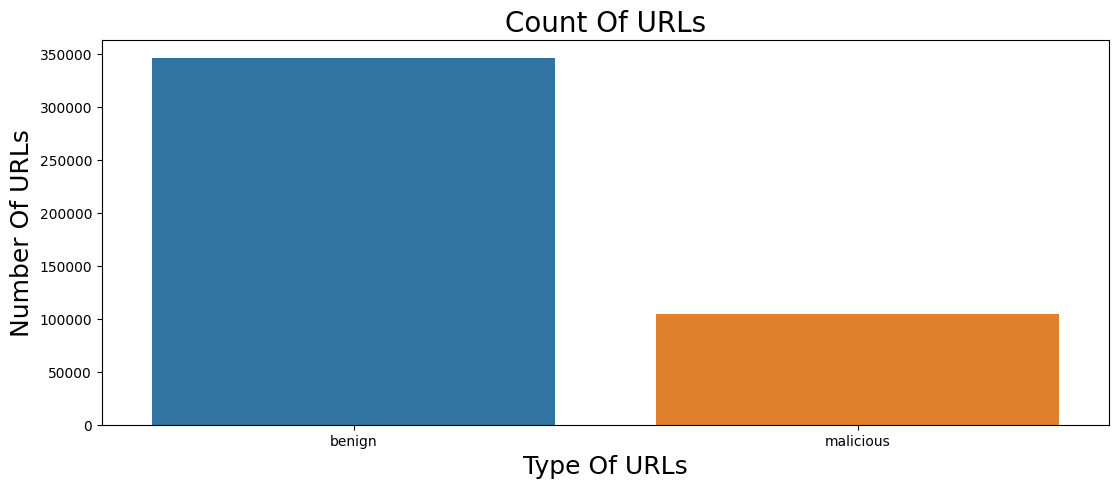

In [7]:
# Lets find how many malicious and non-malicious samples we have
i = urldata["label"].value_counts()
print(i)

plt.figure(figsize=(13,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.show()

In [8]:
# Check for non-numeric columns
non_numeric_columns = urldata.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns
urldata_numeric = urldata.drop(columns=non_numeric_columns)

# Compute correlation matrix
corrmat = urldata_numeric.corr()


Index(['url', 'label', 'result', 'url_length', 'hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?', 'count%',
       'count.', 'count=', 'count-http', 'count-https', 'count-www',
       'count-digits', 'count-letters', 'count_dir', 'use_of_ip', 'short_url'],
      dtype='object')
                         url   label  result  url_length  hostname_length  \
0     https://www.google.com  benign       0          22               14   
1    https://www.youtube.com  benign       0          23               15   
2   https://www.facebook.com  benign       0          24               16   
3      https://www.baidu.com  benign       0          21               13   
4  https://www.wikipedia.org  benign       0          25               17   

   path_length  fd_length  count-  count@  count?  ...  count.  count=  \
0            0          0       0       0       0  ...       2       0   
1            0          0       0       0       0  ...       2       0   
2  

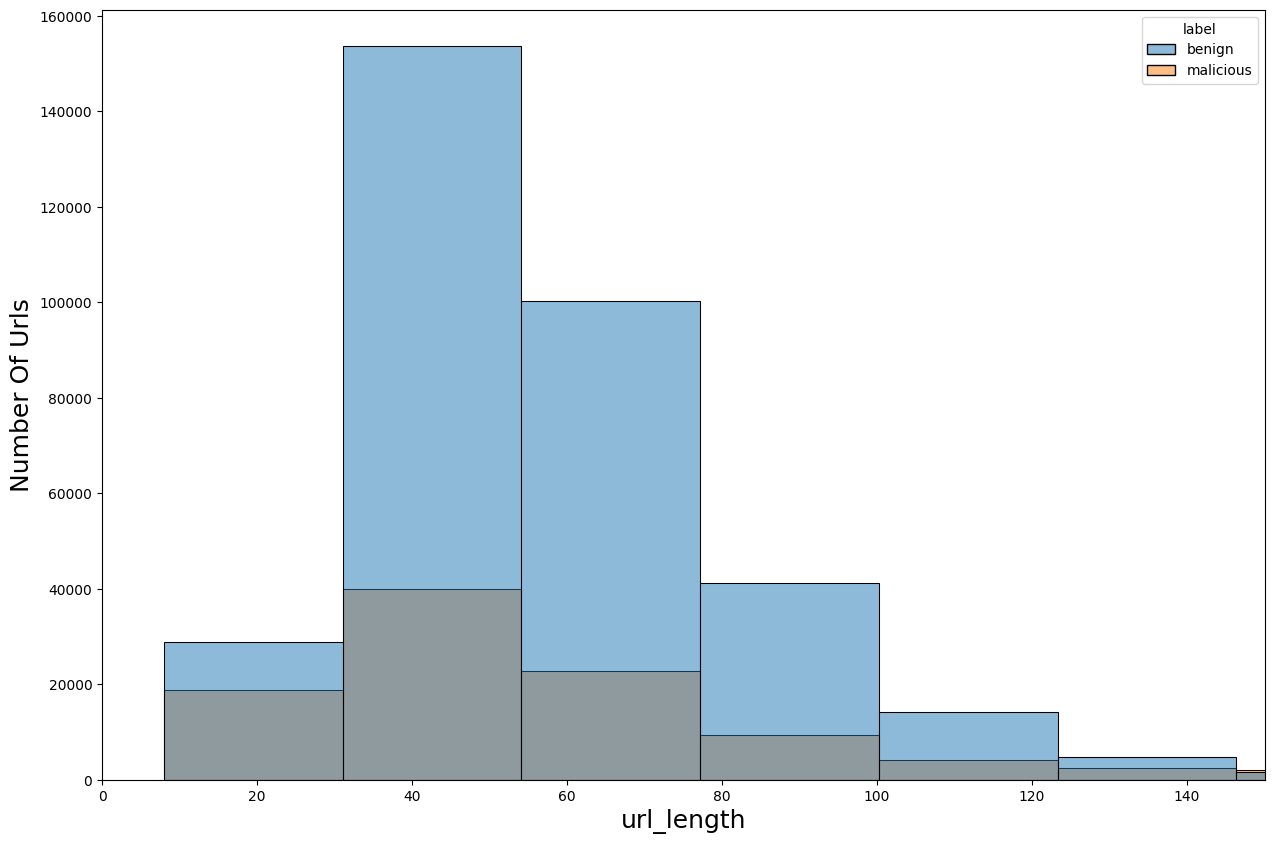

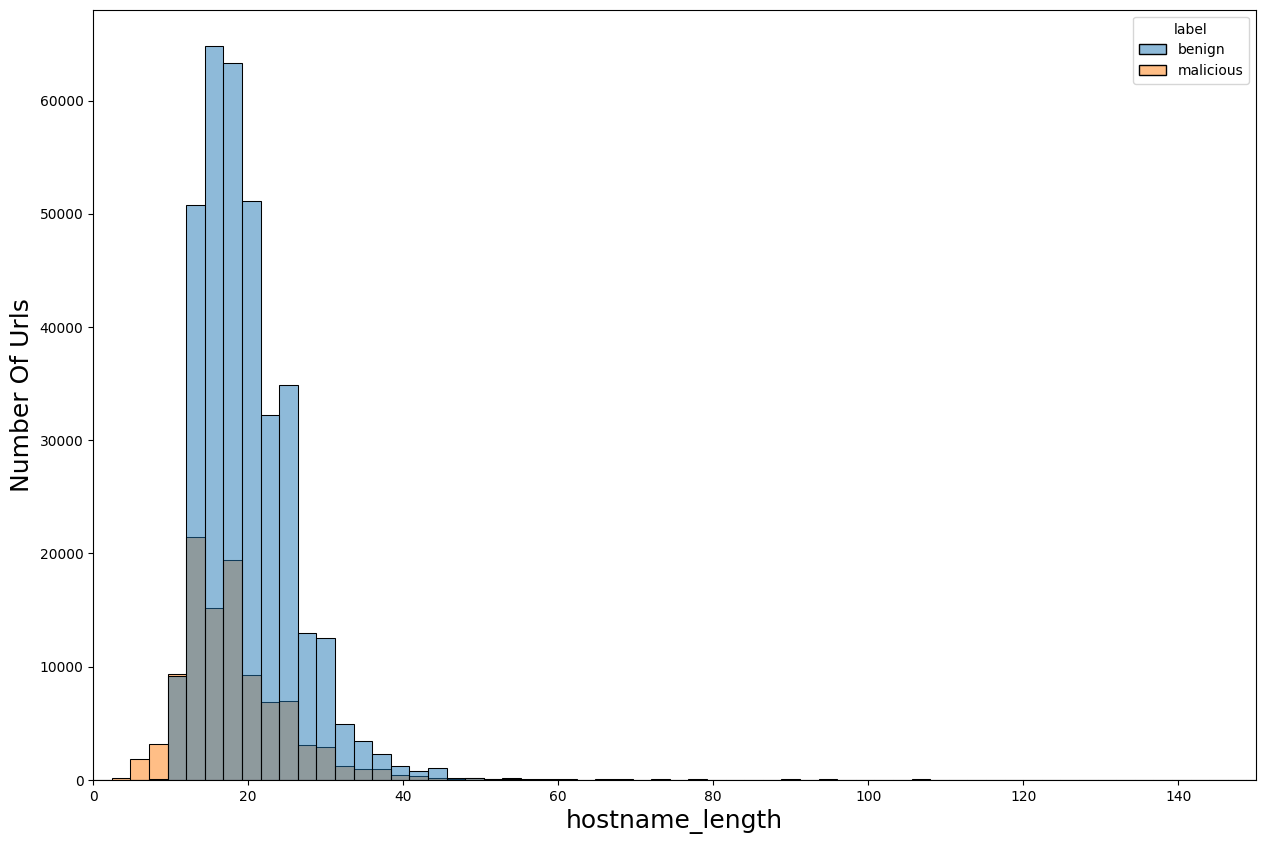

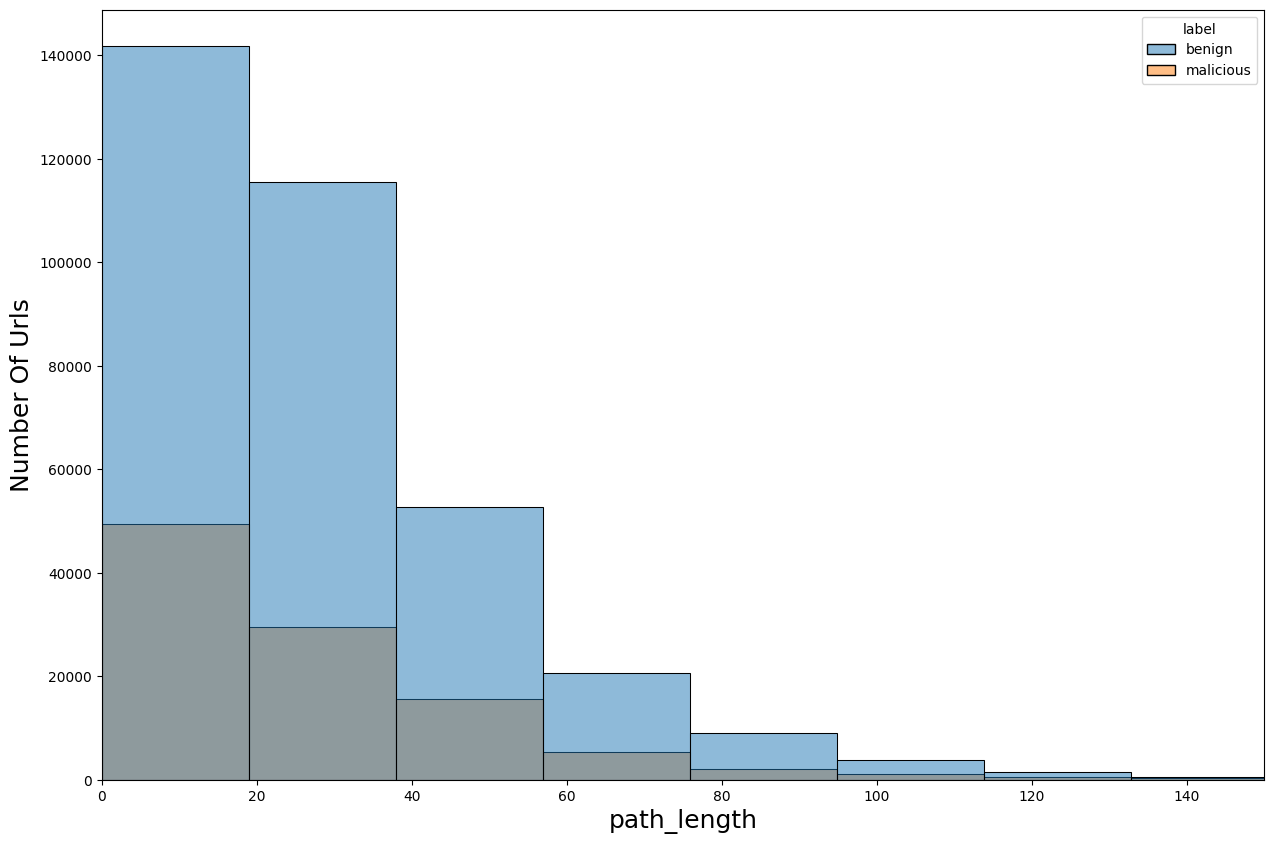

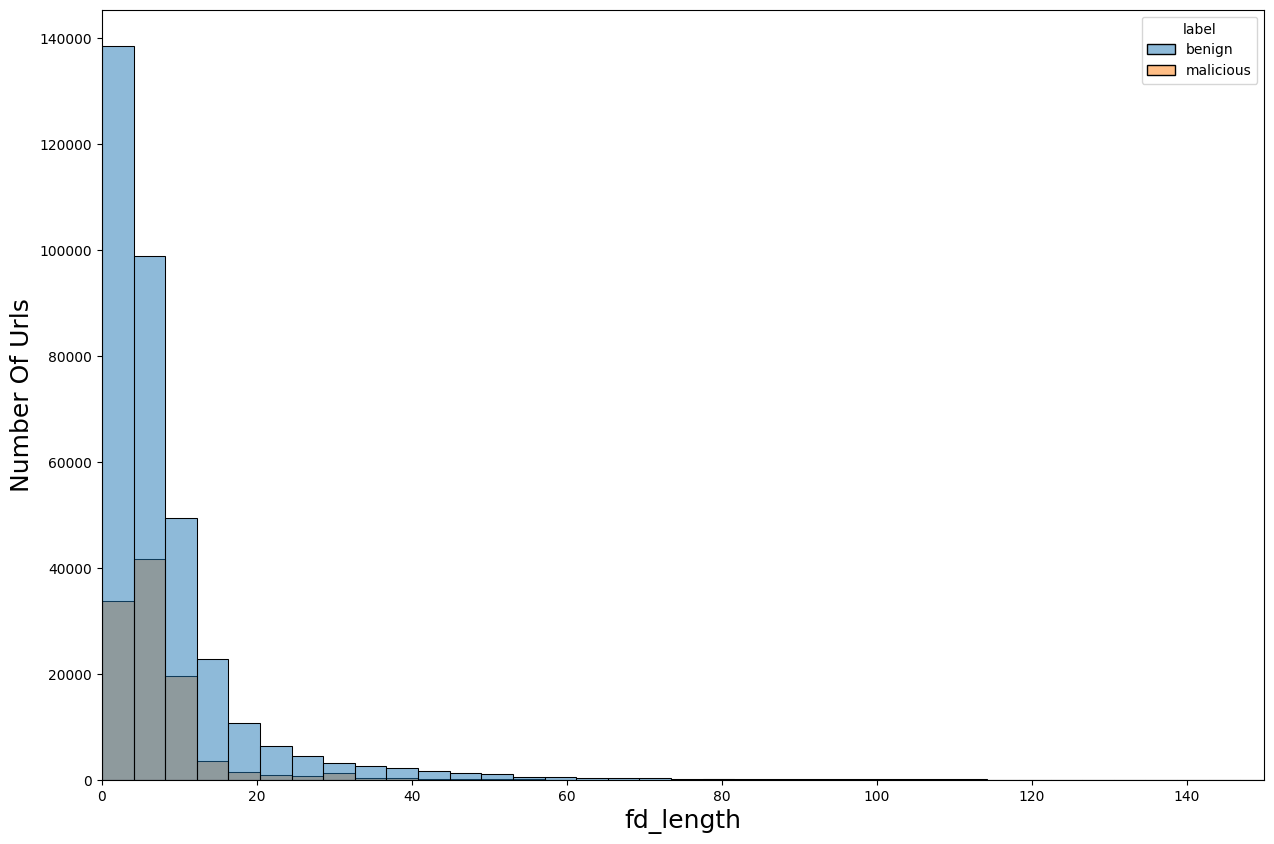

In [9]:
# setting plot sizes
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 15,10

# Check the existence of columns in the DataFrame
print(urldata.columns)

# Confirm the structure of DataFrame
print(urldata.head())

# List of feature names
features = list(urldata.columns)
# Remove columns that are not needed for plotting
features.remove("url")
features.remove("result")

# Specify the histogram features
hist_features = ["url_length", "hostname_length", "path_length", "fd_length"]

for i in hist_features:
    # Check if the column name is present in the DataFrame
    if i in urldata.columns:
        sns.histplot(data=urldata, x=i, bins=100, hue='label')
        plt.xlabel(i, fontsize=18)
        plt.ylabel("Number Of Urls", fontsize=18)
        plt.xlim(0, 150)  # Limiting x-axis for better visualization
        plt.show()
    else:
        print(f"Column '{i}' not found in the DataFrame.")


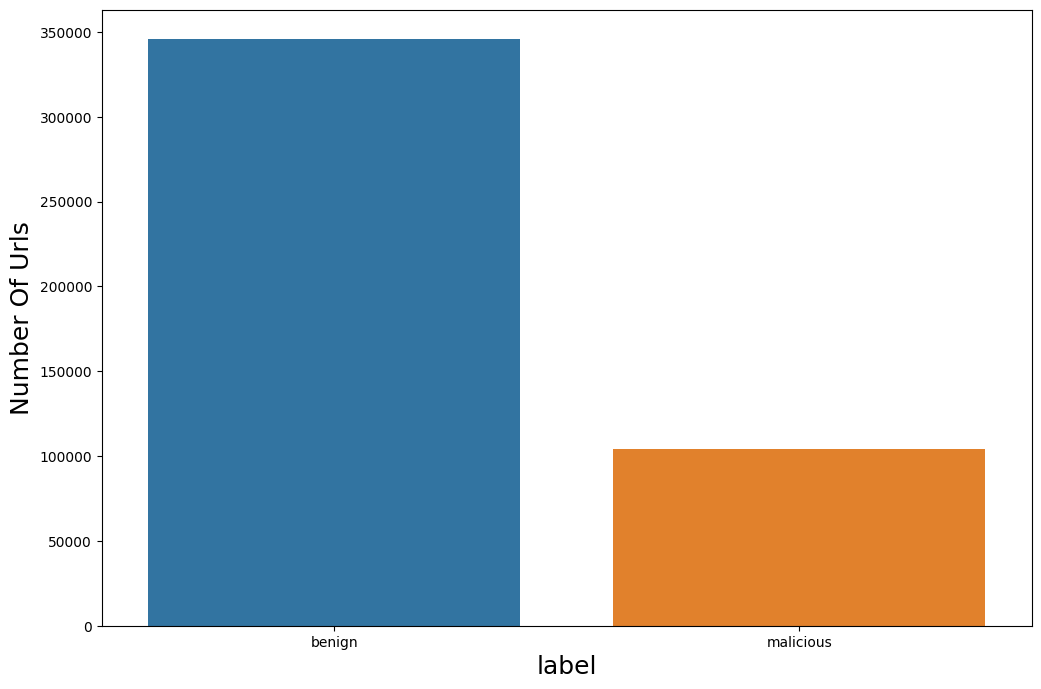

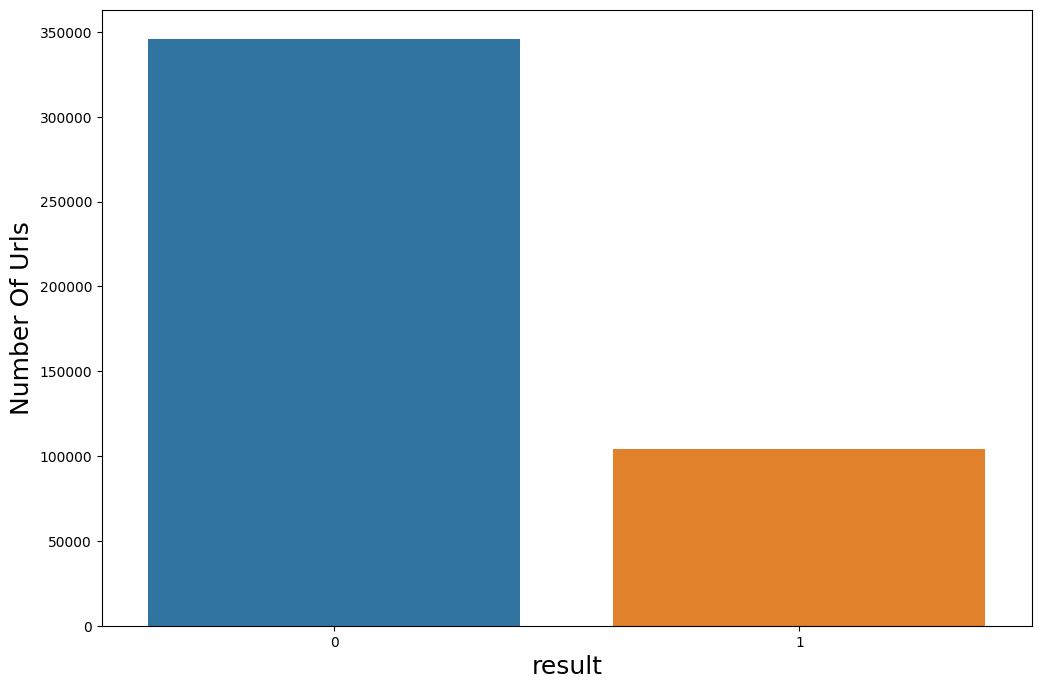

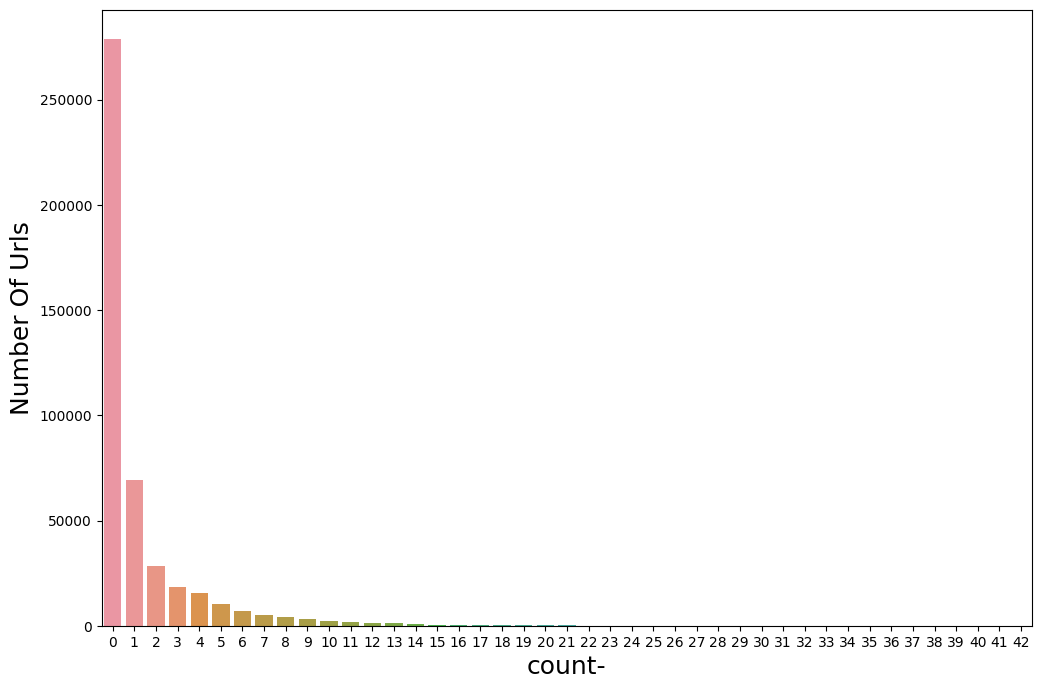

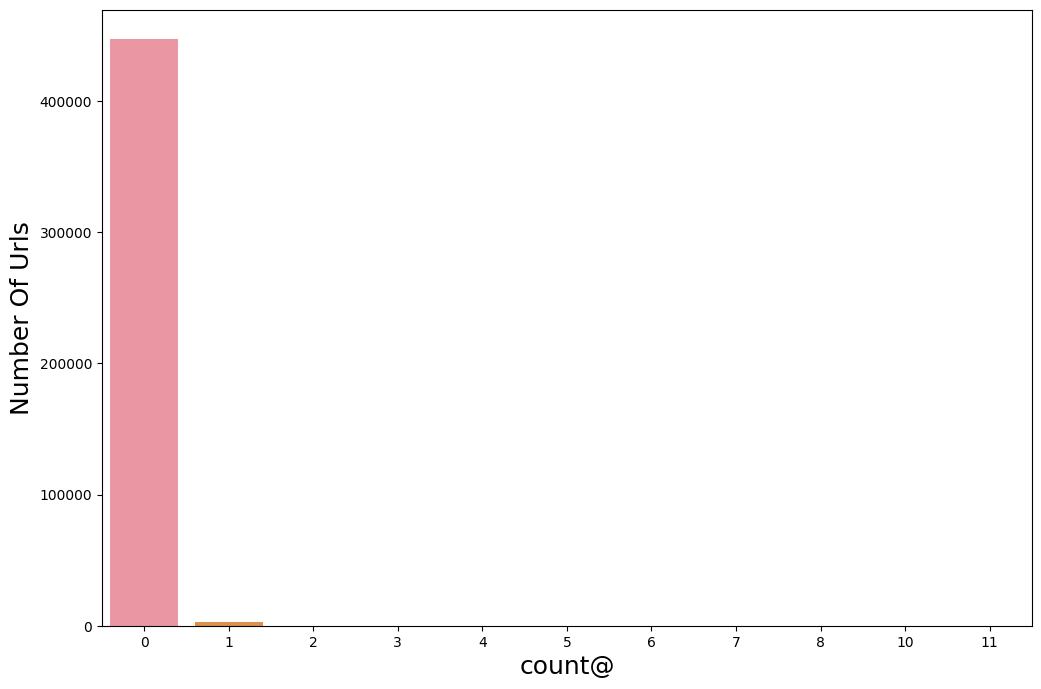

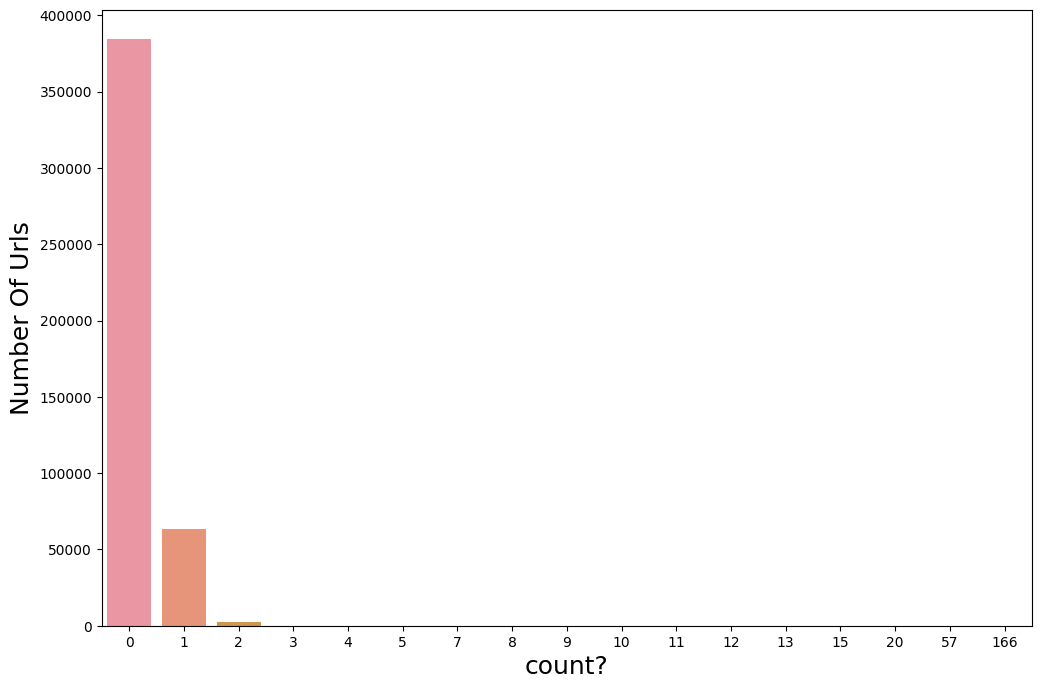

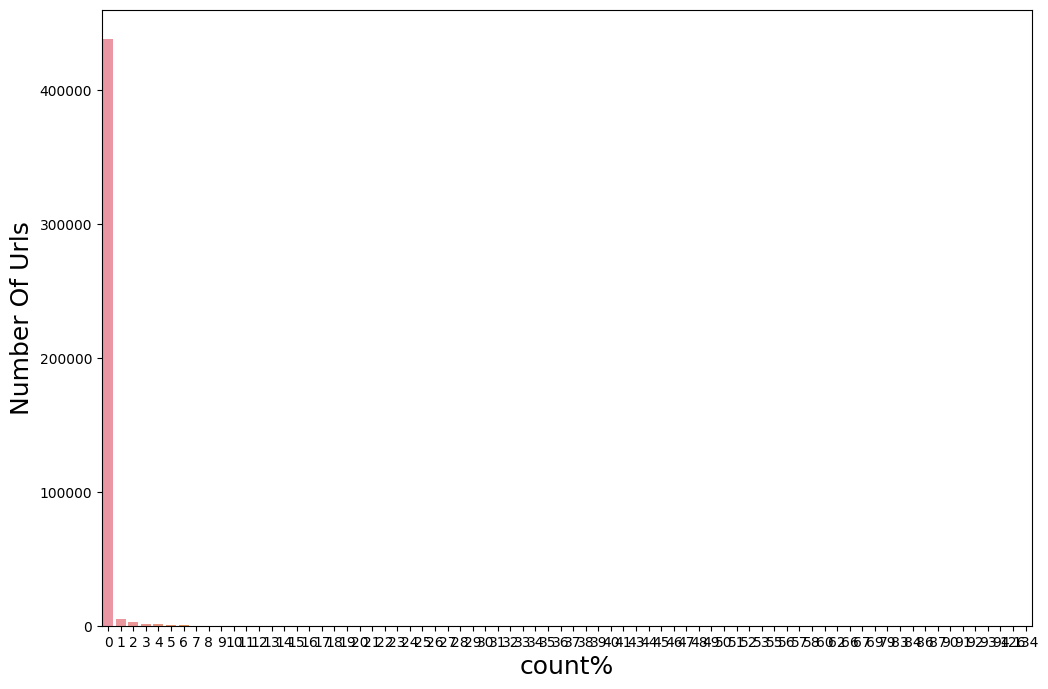

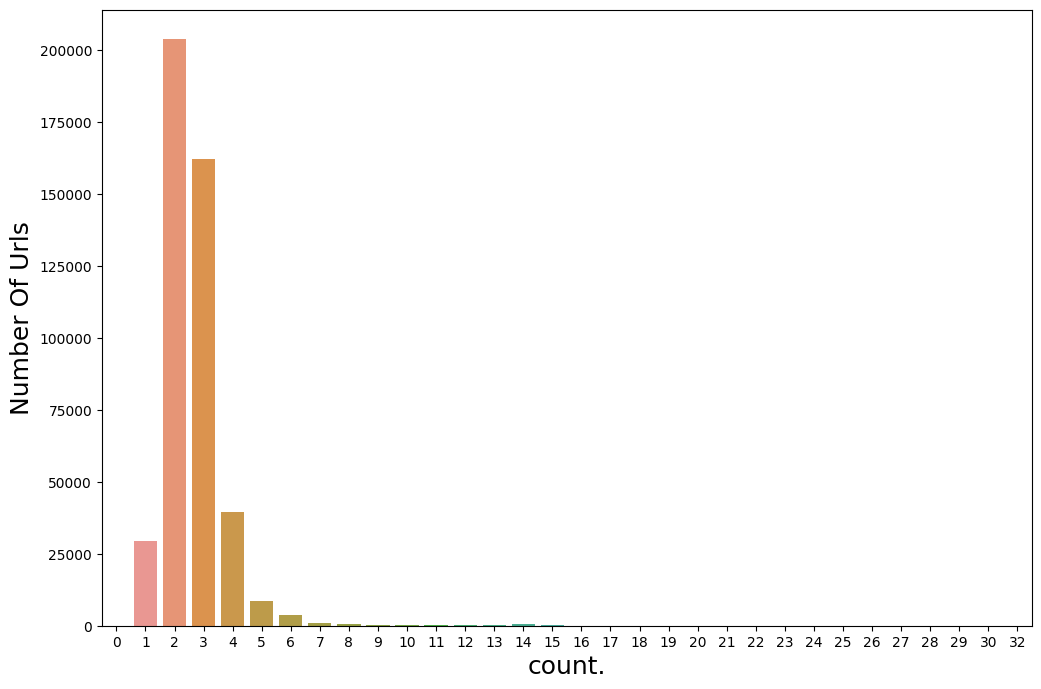

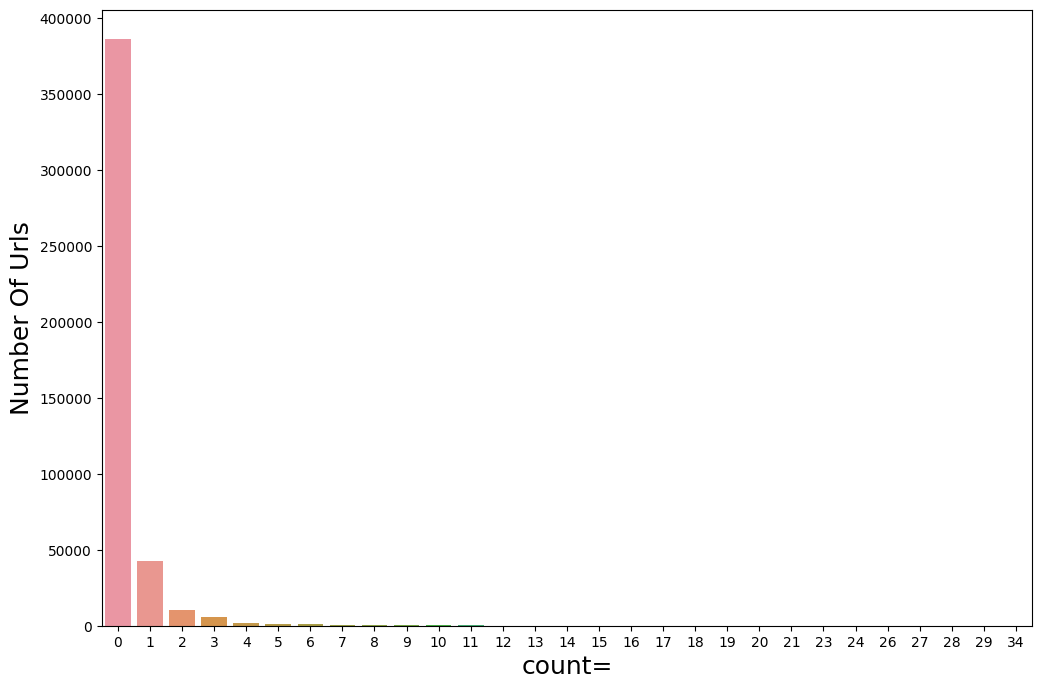

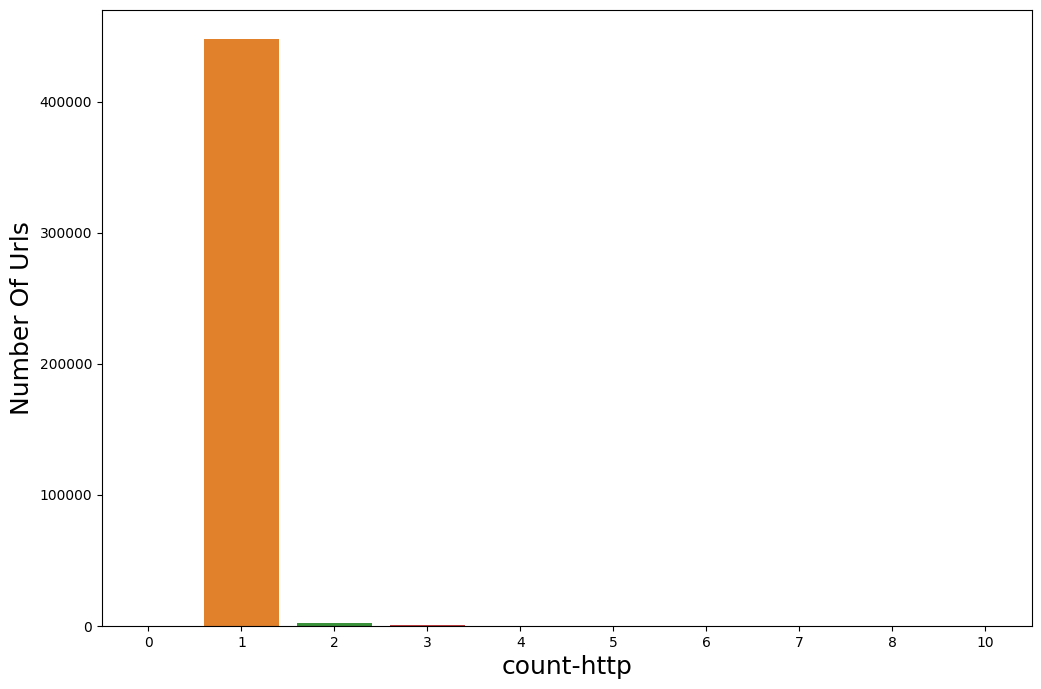

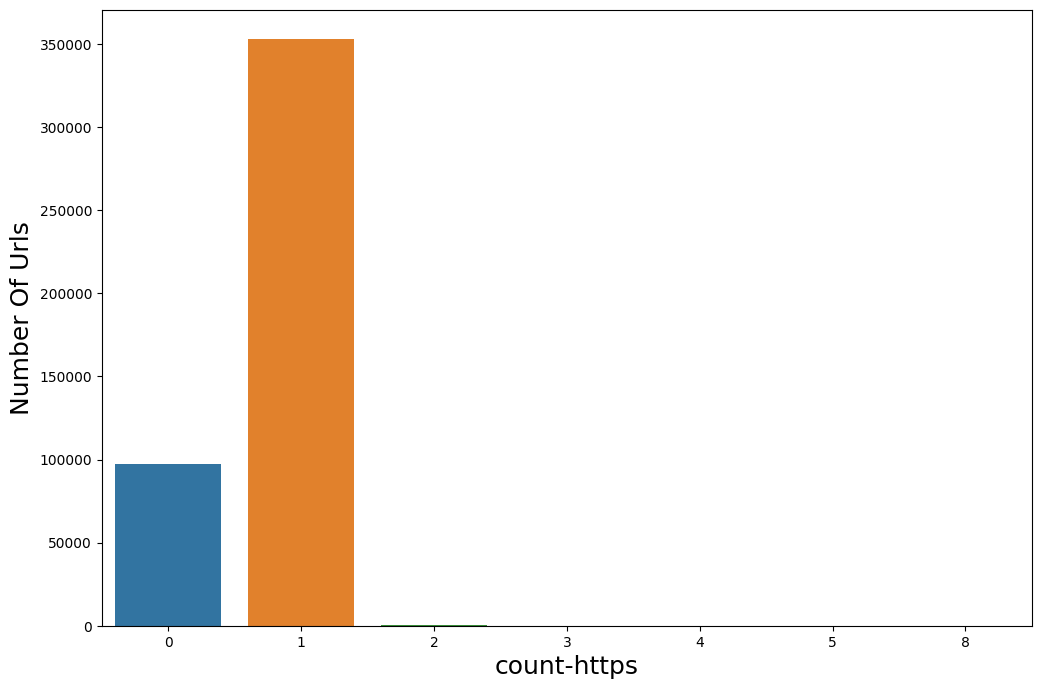

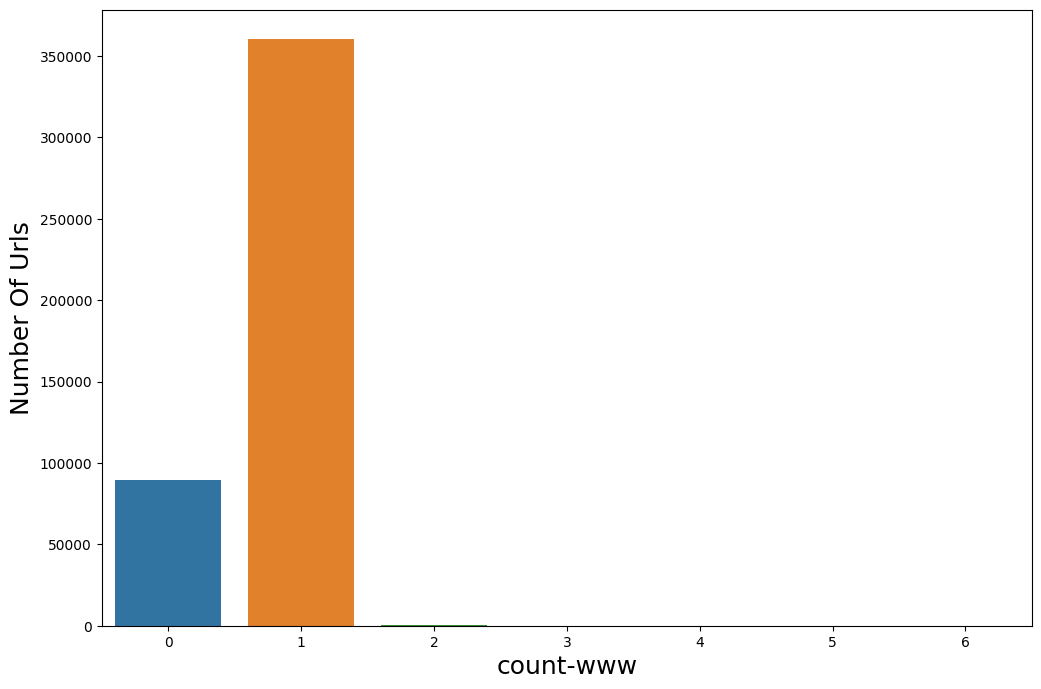

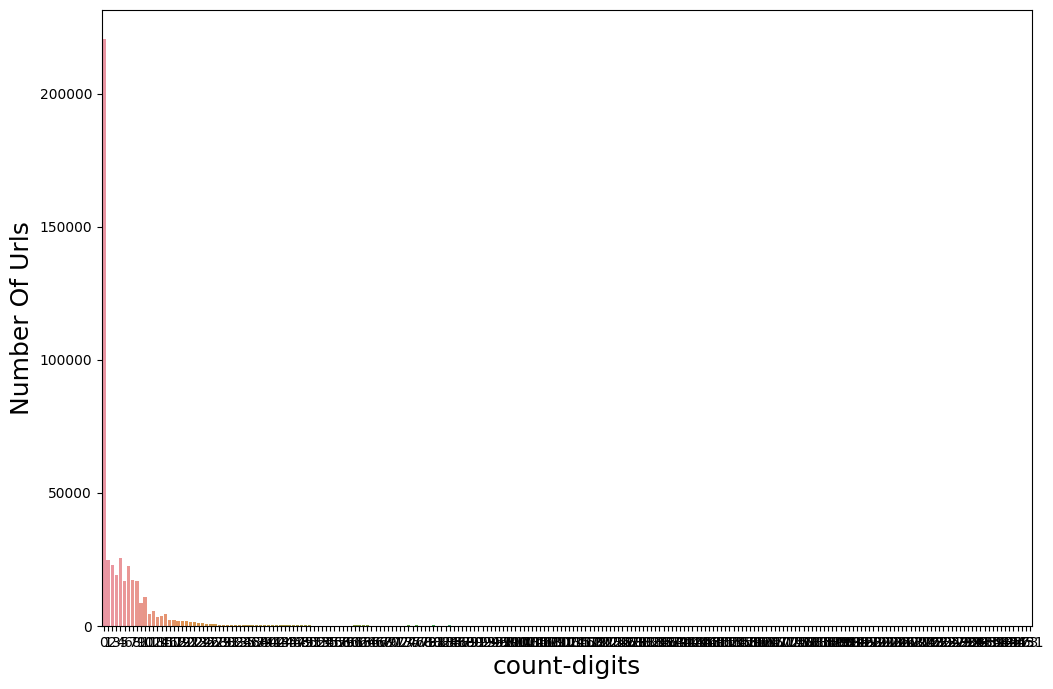

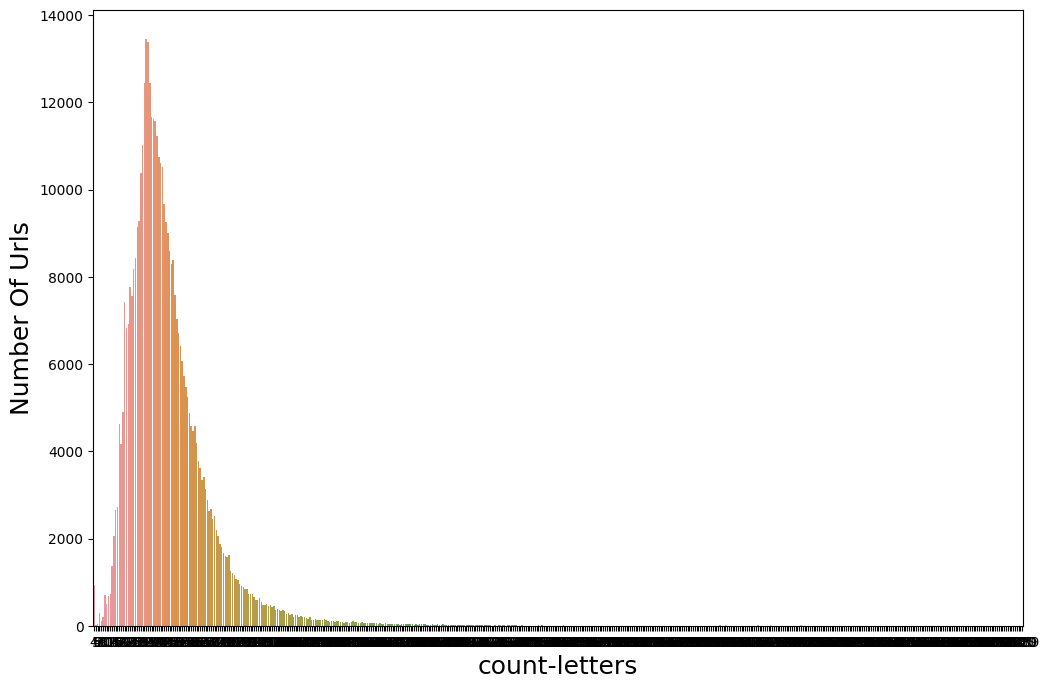

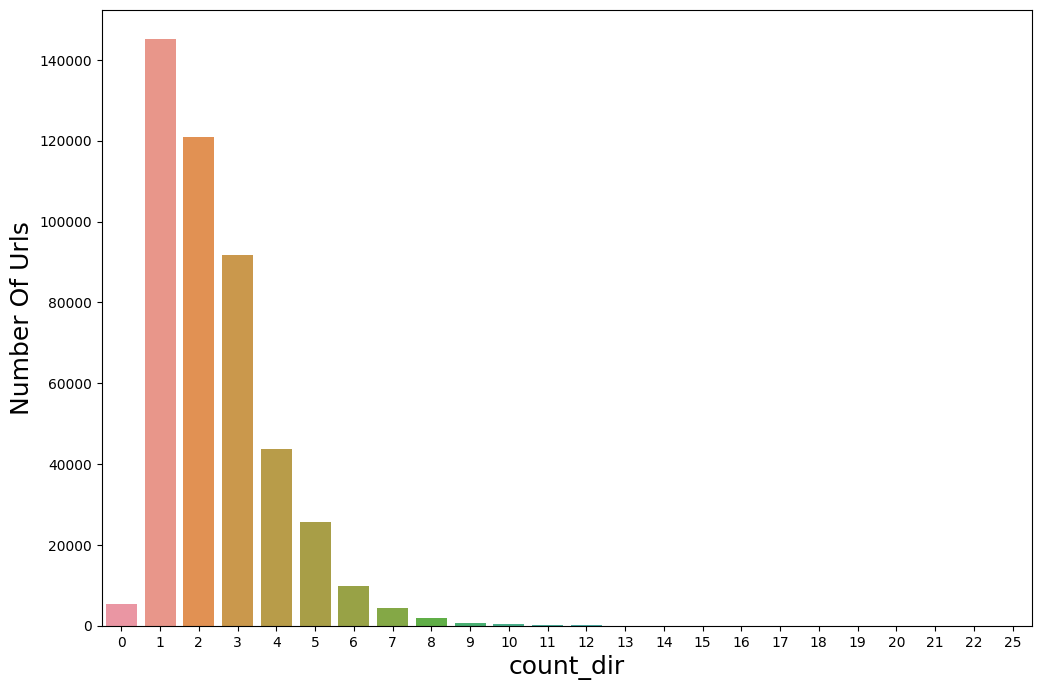

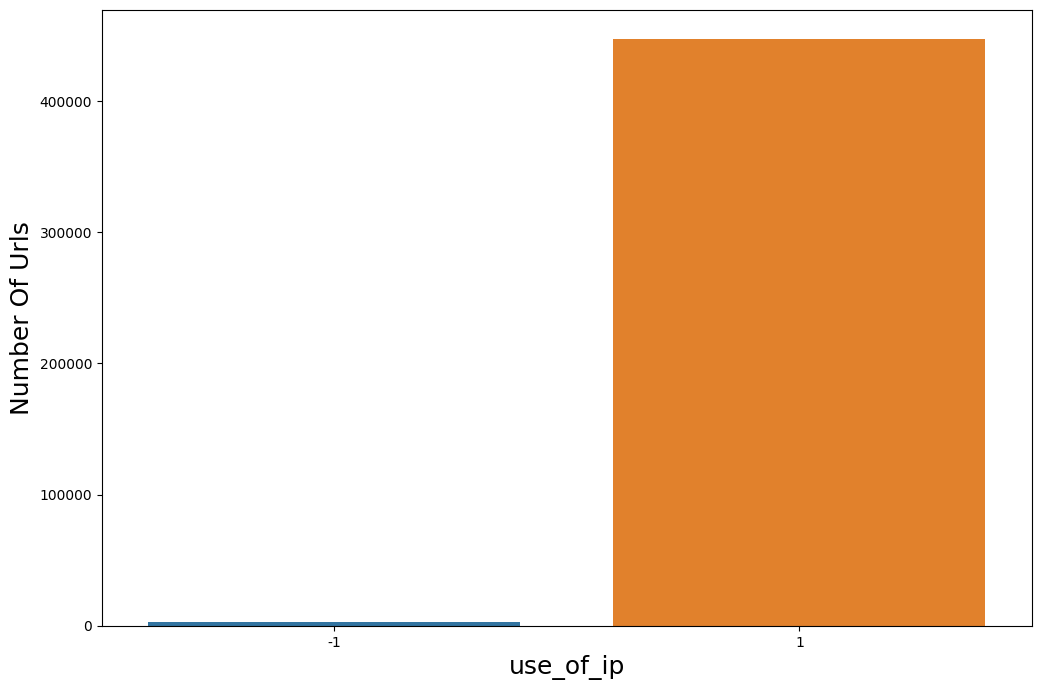

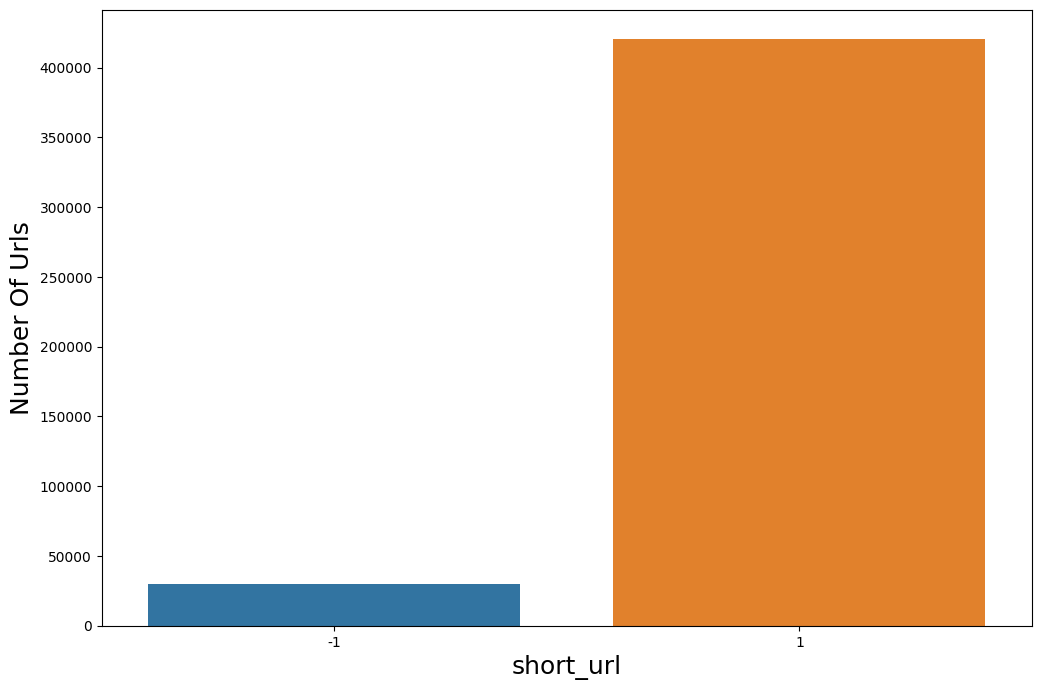

In [10]:
# plotting distrubutions

features = list(urldata.columns) # list of feature names
features.remove("url")

rcParams['figure.figsize'] = 12,8

for i in features:
   
   if i in hist_features:
     continue
   
   sns.countplot(x=i,data=urldata)
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.show()
  

# **Model Training**

Before training our models we'll split the data into train and test dataset. We'll train multiple models and choose the one which gives us the best validation-accuracy. This problem falls under "Binary classification" and some of the models we'll train are :
- Decision Tree
- Random Forest
- Multilayer Perceptron (deep learning)

### **Data Splitting**

We'll follow a 80:20 ratio for data splitting,where we use 80% of data for training and 20% for testing.

In [11]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1


In [12]:
# remove uneccessary columns
urldata.drop(["url","label"],axis=1,inplace=True)

urldata.head()

,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,1
1,0,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1,1
2,0,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1,1
3,0,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1,1
4,0,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1,1


In [13]:
# Independent Variables
x = urldata[['hostname_length',
             'path_length', 'count-', 'count@', 'count?',
             'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
             'count-letters', 'use_of_ip']]

# Dependent Variable
y = urldata['result']


In [14]:
# printing x
x.head()

,hostname_length,path_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,use_of_ip
0,14,0,0,0,0,0,2,0,1,1,1,0,17,1
1,15,0,0,0,0,0,2,0,1,1,1,0,18,1
2,16,0,0,0,0,0,2,0,1,1,1,0,19,1
3,13,0,0,0,0,0,2,0,1,1,1,0,16,1
4,17,0,0,0,0,0,2,0,1,1,1,0,20,1


In [15]:
# printing y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

#### **Oversampling Imbalanced Dataset**

During EDA we found that our dataset is Imbalanced,so we'll now use SMOTE method to oversample the dataset.

In [16]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE object
smote = SMOTE()

# Perform oversampling using fit_resample
x_sample, y_sample = smote.fit_resample(x, y.values.ravel())

# Convert the oversampled arrays back to DataFrame
x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)


In [17]:
# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (691716, 14)
Size of y-sample : (691716, 1)


In [18]:
# DATA SPLITTING 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (553372, 14)
Shape of x_valid:  (138344, 14)
Shape of y_train:  (553372, 1)
Shape of y_valid:  (138344, 1)


## **3] Multilayer Perceptron (Deep Learning)**
A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [20]:
# print input shape
x_train.shape

(553372, 14)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Define your FNN model
model = Sequential([
    Flatten(input_shape=(14, 1)),  # Flatten layer to convert 3D input to 1D
    Dense(512, activation='relu'),  # Dense layer with 512 neurons and ReLU activation
    Dense(256, activation='relu'),  # Dense layer with 256 neurons and ReLU activation
    Dense(128, activation='relu'),  # Dense layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),  # Dense layer with 64 neurons and ReLU activation
    Dense(64, activation='relu'),  # Dense layer with 64 neurons and ReLU activation
    Dense(32, activation='relu'),  # Dense layer with 32 neurons and ReLU activation
    Dense(32, activation='relu'),  # Dense layer with 32 neurons and ReLU activation
    Dense(16, activation='relu'),  # Dense layer with 16 neurons and ReLU activation
    Dense(16, activation='relu'),  # Dense layer with 16 neurons and ReLU activation
    Dense(8, activation='relu'),  # Dense layer with 8 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 14)                0         
                                                                 
 dense_11 (Dense)            (None, 512)               7680      
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)               

In [22]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your deep learning model
plot_model(model, to_file='model_architecture.png', show_shapes=True)

plt.show()

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [22]:
from keras.optimizers import Adam

# Define the learning rate
learning_rate = 0.0001

# Instantiate Adam optimizer with specified learning rate
opt = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])


In [23]:
from keras.callbacks import EarlyStopping

# Compile and train your model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
17293/17293 [==============================] - 101s 6ms/step - loss: 0.0315 - accuracy: 0.9910 - val_loss: 0.0166 - val_accuracy: 0.9963
Epoch 2/10
17293/17293 [==============================] - 101s 6ms/step - loss: 0.0188 - accuracy: 0.9959 - val_loss: 0.0153 - val_accuracy: 0.9967
Epoch 3/10
17293/17293 [==============================] - 99s 6ms/step - loss: 0.0165 - accuracy: 0.9964 - val_loss: 0.0155 - val_accuracy: 0.9969
Epoch 4/10
17293/17293 [==============================] - 97s 6ms/step - loss: 0.0167 - accuracy: 0.9965 - val_loss: 0.0194 - val_accuracy: 0.9952
Epoch 5/10
17293/17293 [==============================] - 87s 5ms/step - loss: 0.0157 - accuracy: 0.9967 - val_loss: 0.0158 - val_accuracy: 0.9969
Epoch 6/10
17293/17293 [==============================] - 78s 5ms/step - loss: 0.0168 - accuracy: 0.9966 - val_loss: 0.0142 - val_accuracy: 0.9970
Epoch 7/10
17293/17293 [==============================] - 150s 9ms/step - loss: 0.0168 - accuracy: 0.9966 - val_loss

In [24]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Expected input shape of the model:", model.input_shape)


Shape of x_train: (553372, 14)
Shape of x_test: (138344, 14)
Expected input shape of the model: (None, 14, 1)


In [ ]:
# custom callback to stop the training when certain metric value is reached

# stop training when validation loss reach 0.1
#class myCallback(keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if(logs.get('val_loss')<0.1):
#            print("\nReached 0.1 val_loss so cancelling training!")
#            self.model.stop_training = True
        
#callback = myCallback()

In [30]:
# start training the model 
#history = model.fit(x_train, y_train, epochs=10,batch_size=256,validation_data=(x_test,y_test),verbose=1)

In [25]:
history.history

{'loss': [0.03147966042160988,
  0.018795957788825035,
  0.01645050011575222,
  0.01669786125421524,
  0.015664879232645035,
  0.01678764820098877,
  0.01676766574382782,
  0.01604687236249447,
  0.01574394665658474,
  0.02464103512465954],
 'accuracy': [0.9909952282905579,
  0.9958527088165283,
  0.9964147210121155,
  0.9964797496795654,
  0.9967291355133057,
  0.9965918064117432,
  0.9966044425964355,
  0.9967092871665955,
  0.9967598915100098,
  0.9966387748718262],
 'val_loss': [0.01657038927078247,
  0.01527741365134716,
  0.015478036366403103,
  0.019418880343437195,
  0.015803679823875427,
  0.014160449616611004,
  0.016467910259962082,
  0.014852188527584076,
  0.014964130707085133,
  0.016296230256557465],
 'val_accuracy': [0.9962846040725708,
  0.996732771396637,
  0.996913492679596,
  0.9952076077461243,
  0.9968990087509155,
  0.9970147013664246,
  0.996638834476471,
  0.9969568848609924,
  0.9969351887702942,
  0.9969568848609924]}

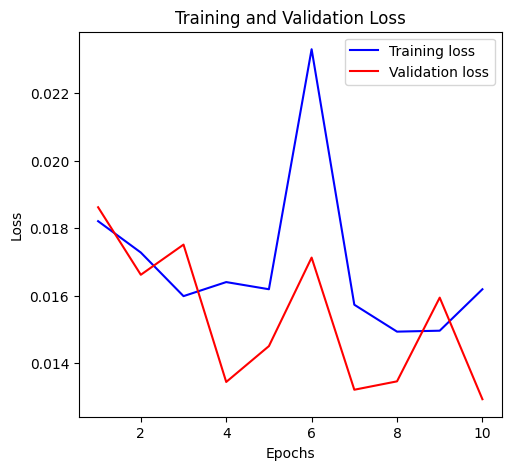

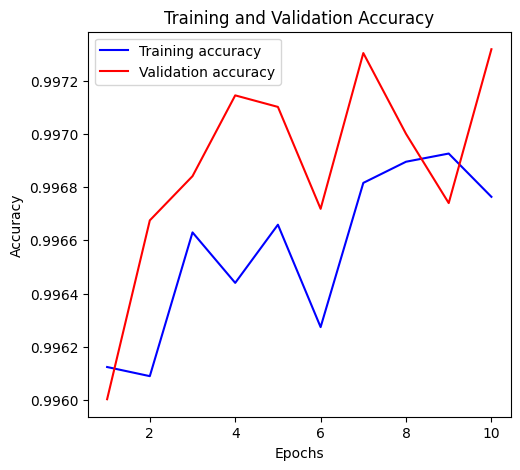

In [32]:
# DISPLAYING MODEL TRAINING HISTORY

import matplotlib.pyplot as plt

# Assuming you have the 'history' object containing training history with 'loss', 'accuracy', 'val_loss', and 'val_accuracy' metrics

epochs = range(1, len(history['loss']) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history['loss'], 'b', label='Training loss')
plt.plot(epochs, history['val_loss'], 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, history['accuracy'], 'b', label='Training accuracy')
plt.plot(epochs, history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




In [27]:
# Evaluate the model on training dataset
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=1)
print('Training loss: {}'.format(train_loss))
print('Training Accuracy: {}'.format(train_acc))

# Evaluate the model on test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


17293/17293 [==============================] - 107s 6ms/step - loss: 0.0161 - accuracy: 0.9970
Training loss: 0.016074590384960175
Training Accuracy: 0.9970020055770874
4324/4324 [==============================] - 24s 6ms/step - loss: 0.0163 - accuracy: 0.9970
Test loss: 0.016296230256557465
Test Accuracy: 0.9969568848609924


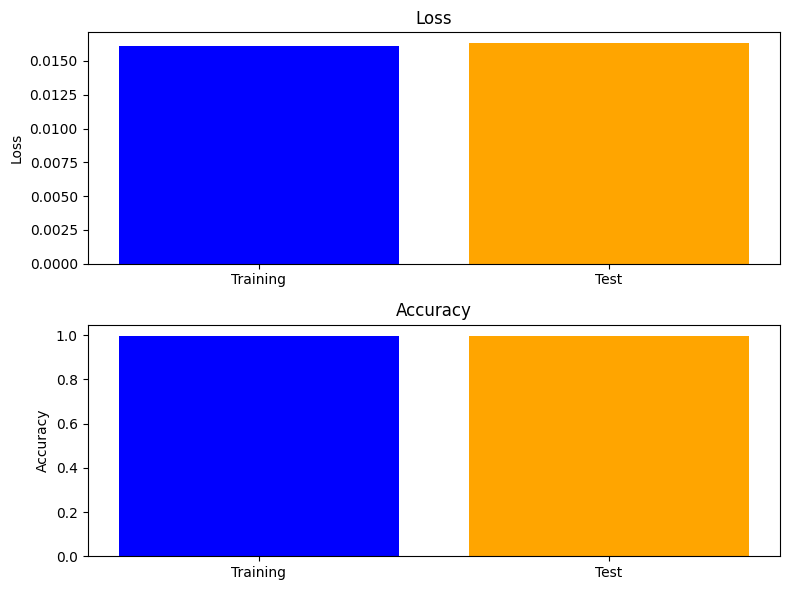

In [28]:
import matplotlib.pyplot as plt

# Data
loss = [train_loss, test_loss]
accuracy = [train_acc, test_acc]
labels = ['Training', 'Test']

# Plotting
plt.figure(figsize=(8, 6))

# Plotting loss
plt.subplot(2, 1, 1)
plt.bar(labels, loss, color=['blue', 'orange'])
plt.title('Loss')
plt.ylabel('Loss')

# Plotting accuracy
plt.subplot(2, 1, 2)
plt.bar(labels, accuracy, color=['blue', 'orange'])
plt.title('Accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [29]:
def view_results(predictions, actual, threshold=0.5):
    for pred, actual_label in zip(predictions, actual):
        if isinstance(pred, np.ndarray):  # Check if pred is an array
            if len(pred) == 1:  # Binary classification
                if pred[0] >= threshold:
                    print("Malicious")
                else:
                    print("Non-Malicious")
            else:  # Multi-class classification
                predicted_label = np.argmax(pred)
                actual_label = np.argmax(actual_label)
                if predicted_label == actual_label:
                    print("Correct prediction:", predicted_label)
                else:
                    print("Incorrect prediction. Predicted:", predicted_label, "Actual:", actual_label)
        else:  # If pred is not an array
            if pred >= threshold:  # Binary classification
                print("Malicious")
            else:
                print("Non-Malicious")

# Example usage
# Assuming 'model' is your trained model, 'x_test' is your test data, and 'y_test' are the corresponding labels

# Predict on test data
pred_test = model.predict(x_test)

# View results
print("PREDICTED : ")
view_results(pred_test[:10], y_test[:10])  # View results for the first 10 samples
print("\n")
print("ACTUAL : ")
view_results(y_test[:10], y_test[:10])  # View actual labels for the first 10 samples


4324/4324 [==============================] - 27s 6ms/step
PREDICTED : 
Non-Malicious


ACTUAL : 
Non-Malicious


### **Saving the prediction model**

In [129]:
# Save Model Weights and Architecture Together
model.save("Malicious_URL_Prediction.h5")

### **CONCLUSION : The objective of this notebook have been achieved. We trained and saved our models which we can now use in production environment.**